<a href="https://colab.research.google.com/github/J-Jumanah/Data-Science-and-Machine-Learning/blob/main/Prediction_of_Housing_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Housing Price Prediction Data
>> Jumanah Jan



```
Dataset called Housing its contained 545 Instances and 13 features.
Brief description: Predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc.

The source: ( https://www.kaggle.com/datasets/yasserh/housing-prices-dataset ).

```



# 1- Data Cleaning

In [ ]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


#Read data from CSV file
data = pd.read_csv('/content/Housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
#Explore the data
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [ ]:
#The column
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')



```
The target is [price]

```



In [ ]:
#Check the null
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64



```
# No missing valuse
```



In [ ]:
#Total of each culumn
data.sum()

price                                                      2597867440
area                                                          2807045
bedrooms                                                         1616
bathrooms                                                         701
stories                                                           984
mainroad            yesyesyesyesyesyesyesyesyesyesyesyesyesyesyesy...
guestroom           nonononoyesnononoyesyesnoyesnonononoyesnoyesno...
basement            nonoyesyesyesyesnonoyesnoyesyesnononoyesyesnon...
hotwaterheating     nononononononononononoyesnoyesnonononononoyesn...
airconditioning     yesyesnoyesyesyesyesnoyesyesyesnoyesnononoyesy...
parking                                                           378
prefarea            yesnoyesyesnoyesyesnoyesyesyesnoyesnoyesnoyesn...
furnishingstatus    furnishedfurnishedsemi-furnishedfurnishedfurni...
dtype: object

> Checking the class column values

In [ ]:
data['mainroad'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
data['guestroom'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
data['basement'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
data['hotwaterheating'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
data['airconditioning'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
data['prefarea'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
data['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [ ]:
#Check for duplicate rows
data.duplicated().sum()

0

In [ ]:
#Check for outliers (Five point summury)
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
#saving the new dataframe into a csv file
cleanedData = data
cleanedData.to_csv('Housing_clean.csv')

<ipython-input-309-5912fde957a3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'], color="b");


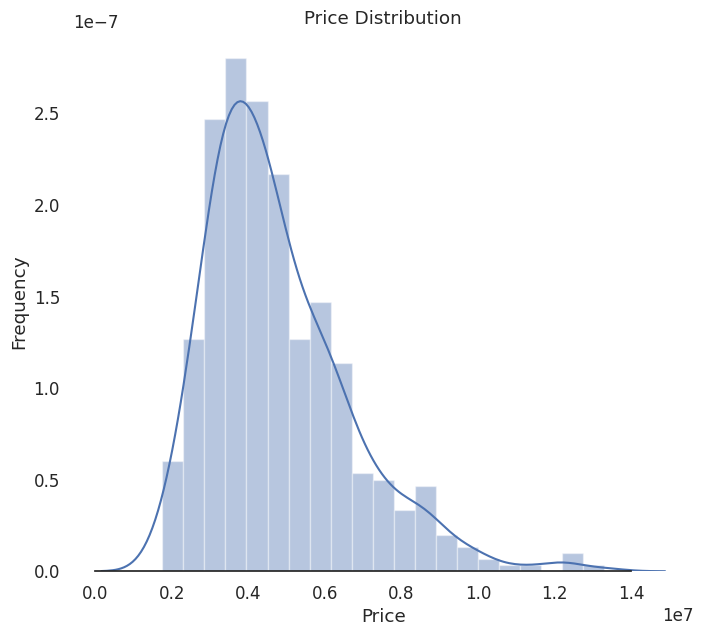

In [ ]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
sns.distplot(data['price'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Price")
ax.set(title="Price Distribution")
sns.despine(trim=True, left=True)
plt.show()

# 2- Data Processing

In [ ]:
# Normalization using StandardScaler
data = cleanedData
columnsToNormalize = ['price','area','bedrooms','bathrooms','stories','parking']
scaler = StandardScaler()
data[columnsToNormalize] = scaler.fit_transform(data[columnsToNormalize])
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,yes,no,no,no,yes,1.517692,yes,furnished
1,4.004484,1.757010,1.403419,5.405809,2.532024,yes,no,no,no,yes,2.679409,no,furnished
2,4.004484,2.218232,0.047278,1.421812,0.224410,yes,no,yes,no,no,1.517692,yes,semi-furnished
3,3.985755,1.083624,1.403419,1.421812,0.224410,yes,no,yes,no,yes,2.679409,yes,furnished
4,3.554979,1.046726,1.403419,-0.570187,0.224410,yes,yes,yes,no,yes,1.517692,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397,yes,no,yes,no,no,1.517692,no,unfurnished
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397,no,no,no,no,no,-0.805741,no,semi-furnished
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397,yes,no,no,no,no,-0.805741,no,unfurnished
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397,no,no,no,no,no,-0.805741,no,furnished


In [ ]:
#Scaling to a specific range [0, 1] using MinMaxScaler
min_max_scaler = MinMaxScaler()
data[columnsToNormalize] = min_max_scaler.fit_transform(data[columnsToNormalize])
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,yes,no,no,no,yes,0.666667,yes,furnished
1,0.909091,0.502405,0.6,1.000000,1.000000,yes,no,no,no,yes,1.000000,no,furnished
2,0.909091,0.571134,0.4,0.333333,0.333333,yes,no,yes,no,no,0.666667,yes,semi-furnished
3,0.906061,0.402062,0.6,0.333333,0.333333,yes,no,yes,no,yes,1.000000,yes,furnished
4,0.836364,0.396564,0.6,0.000000,0.333333,yes,yes,yes,no,yes,0.666667,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.006061,0.092784,0.2,0.000000,0.000000,yes,no,yes,no,no,0.666667,no,unfurnished
541,0.001485,0.051546,0.4,0.000000,0.000000,no,no,no,no,no,0.000000,no,semi-furnished
542,0.000000,0.135395,0.2,0.000000,0.000000,yes,no,no,no,no,0.000000,no,unfurnished
543,0.000000,0.086598,0.4,0.000000,0.000000,no,no,no,no,no,0.000000,no,furnished


> Replace 'YES' with 1 and 'NO' with 0 in the following columns:
[mainroad], [guestroom],	[basement], [hotwaterheating], [airconditioning], [prefarea]

In [ ]:
data['mainroad'] = data['mainroad'].replace({'yes': 1, 'no': 0})
data['guestroom'] = data['guestroom'].replace({'yes': 1, 'no': 0})
data['basement'] = data['basement'].replace({'yes': 1, 'no': 0})
data['hotwaterheating'] = data['hotwaterheating'].replace({'yes': 1, 'no': 0})
data['airconditioning'] = data['airconditioning'].replace({'yes': 1, 'no': 0})
data['prefarea'] = data['prefarea'].replace({'yes': 1, 'no': 0})
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,furnished
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,furnished
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,semi-furnished
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,furnished
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.006061,0.092784,0.2,0.000000,0.000000,1,0,1,0,0,0.666667,0,unfurnished
541,0.001485,0.051546,0.4,0.000000,0.000000,0,0,0,0,0,0.000000,0,semi-furnished
542,0.000000,0.135395,0.2,0.000000,0.000000,1,0,0,0,0,0.000000,0,unfurnished
543,0.000000,0.086598,0.4,0.000000,0.000000,0,0,0,0,0,0.000000,0,furnished


> Replace 'unfurnished' with 0, 'semi-furnished' with 1 and, 'furnished' with 2 in the [furnishingstatus] column

In [ ]:
data['furnishingstatus'] = data['furnishingstatus'].replace({'unfurnished': 0, 'semi-furnished': 1, 'furnished':2})
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,2
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,2
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,2
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.006061,0.092784,0.2,0.000000,0.000000,1,0,1,0,0,0.666667,0,0
541,0.001485,0.051546,0.4,0.000000,0.000000,0,0,0,0,0,0.000000,0,1
542,0.000000,0.135395,0.2,0.000000,0.000000,1,0,0,0,0,0.000000,0,0
543,0.000000,0.086598,0.4,0.000000,0.000000,0,0,0,0,0,0.000000,0,2


In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,2
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,2
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,2
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,2


# 3- Data Visualization

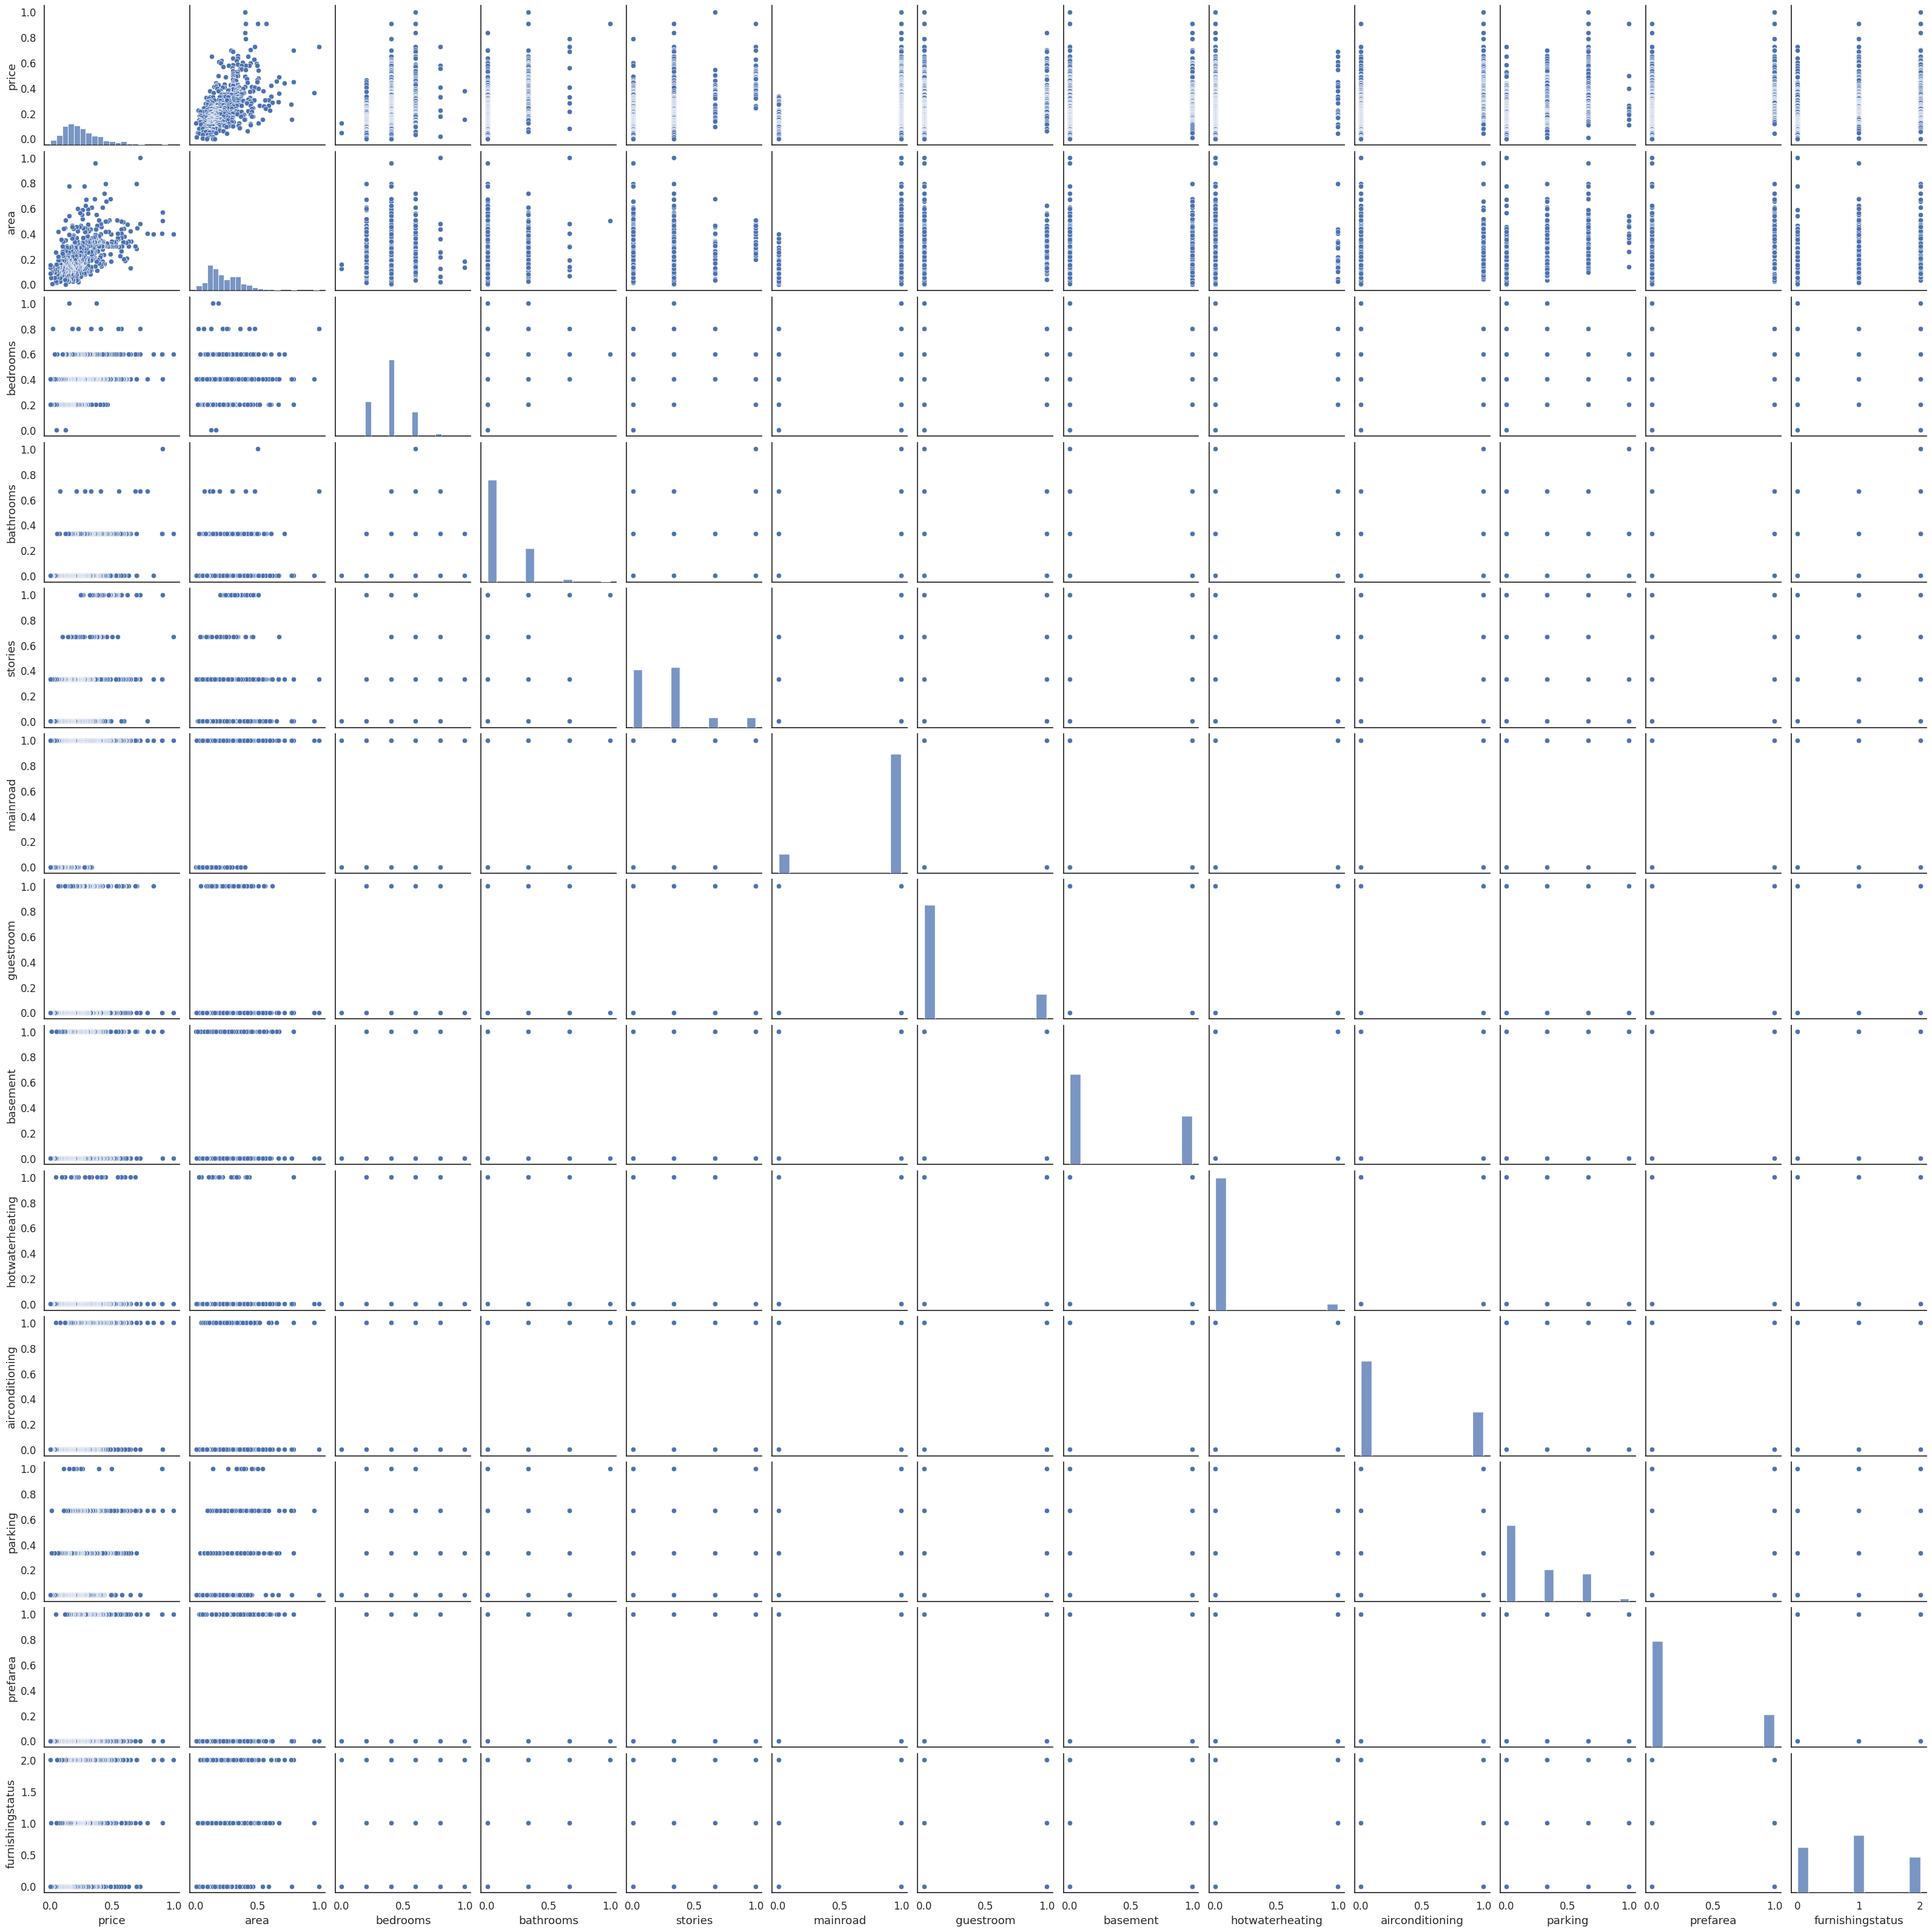

In [ ]:
sns.pairplot(data)
plt.show()

## Scatterplot

Text(0.5, 1.02, 'Scatterplot of Housing Features')

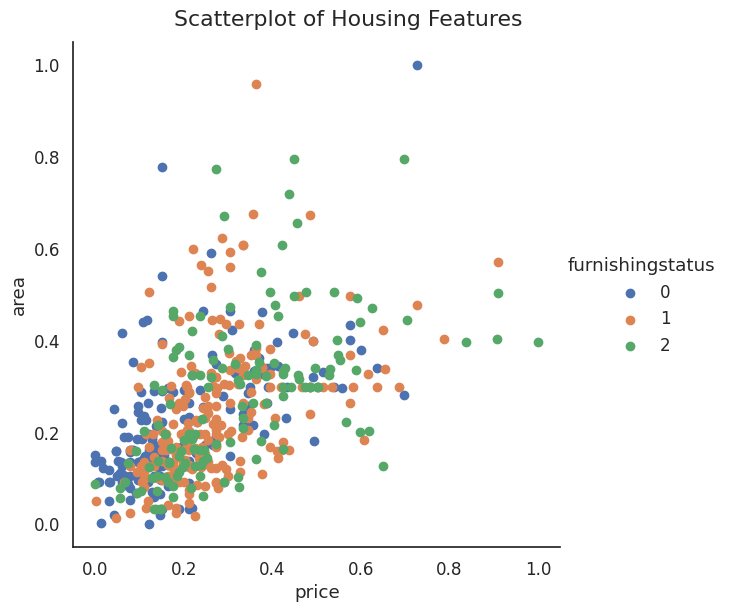

In [ ]:
sns.FacetGrid(data, hue ="furnishingstatus", height = 6).map(plt.scatter, 'price' ,'area').add_legend()
plt.suptitle("Scatterplot of Housing Features", y=1.02)

## Correlation Matrix

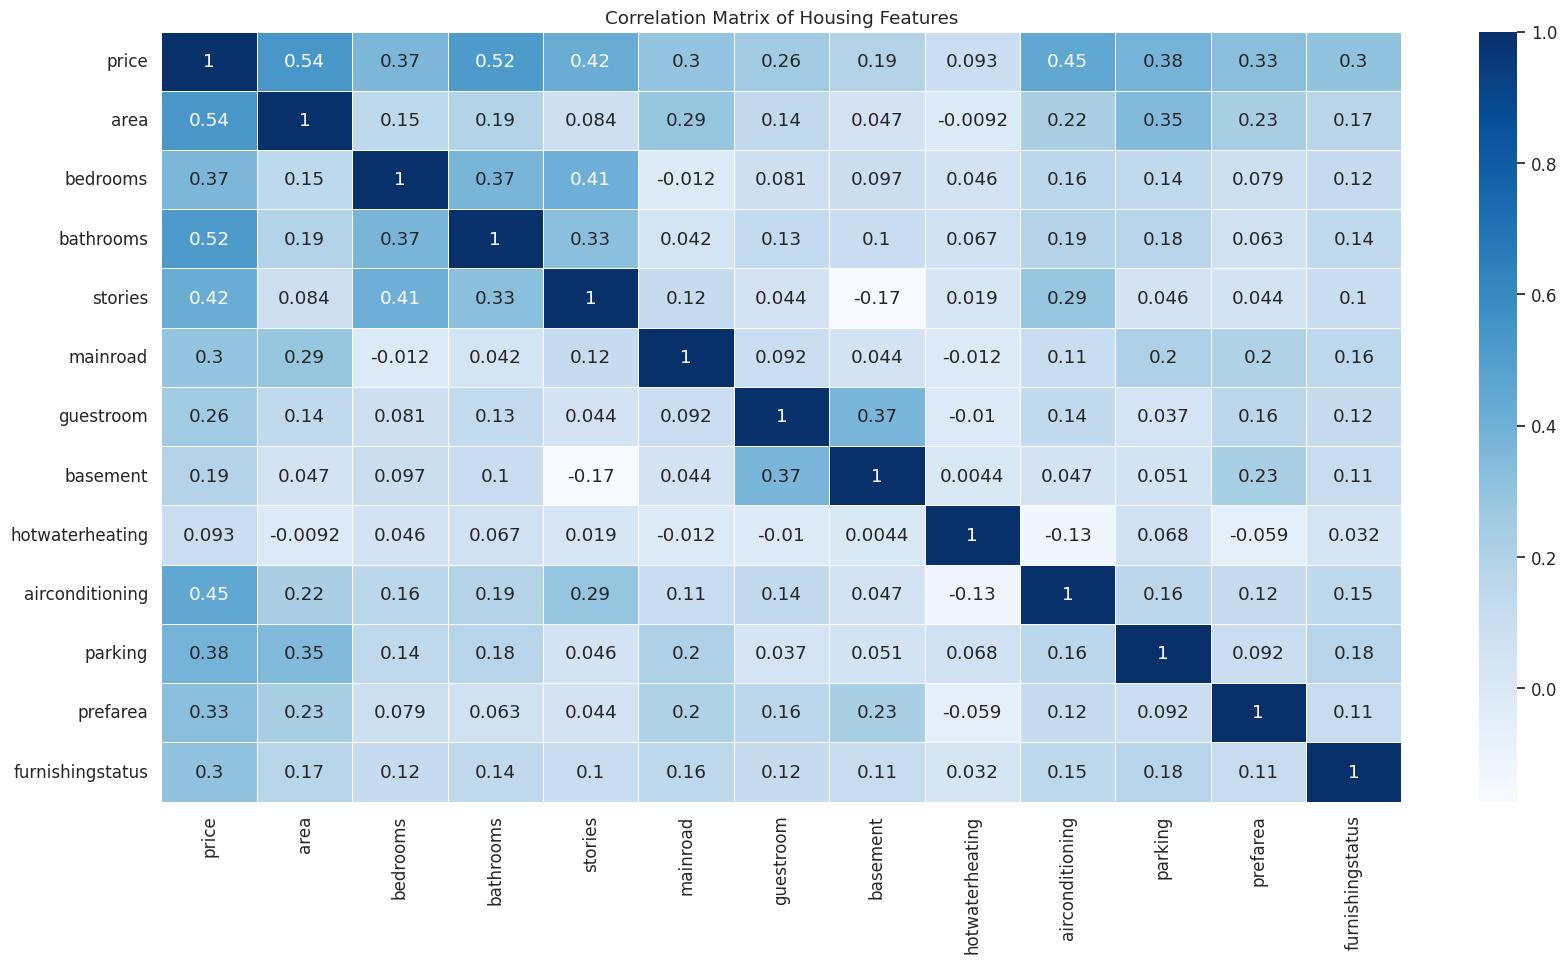

In [ ]:
correlation_matrix = data.corr()
sns.set(font_scale=1.10)
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", linewidths=.5)
plt.title("Correlation Matrix of Housing Features")
plt.show()

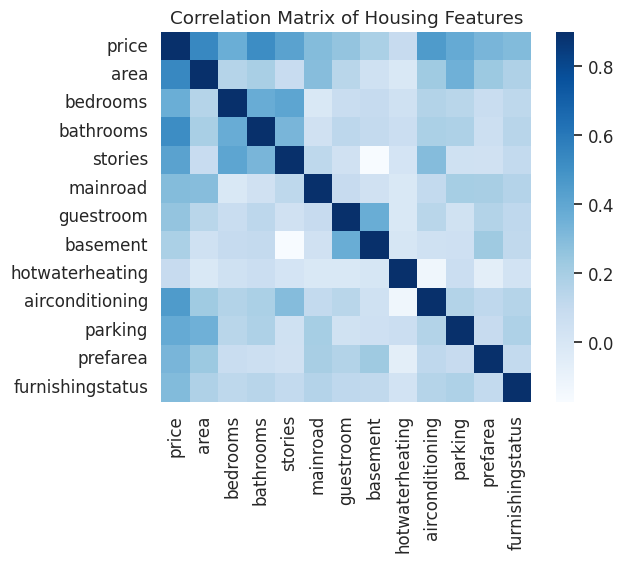

In [ ]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, vmax=0.9, cmap="Blues", square=True)
plt.title("Correlation Matrix of Housing Features")
plt.show()

## Distribution

<ipython-input-319-5912fde957a3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'], color="b");


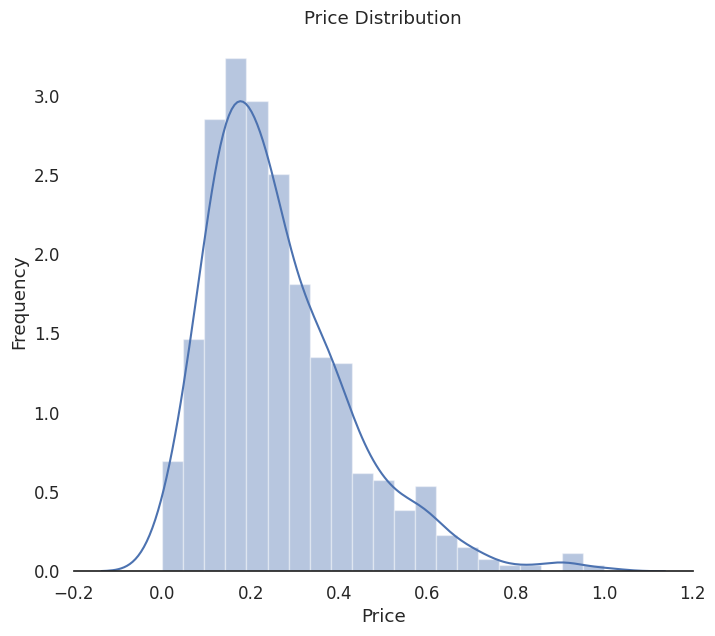

In [ ]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
sns.distplot(data['price'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Price")
ax.set(title="Price Distribution")
sns.despine(trim=True, left=True)
plt.show()

## Stripplot

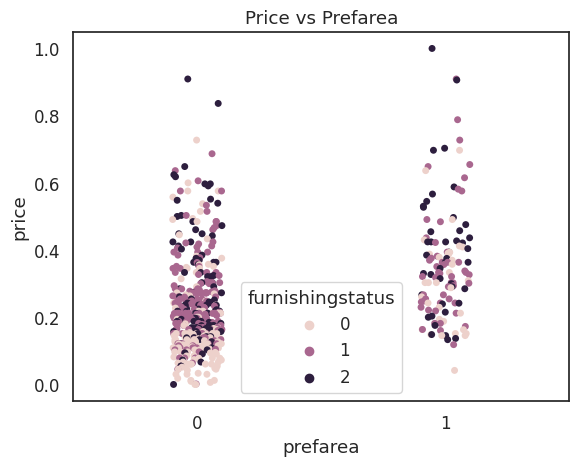

In [ ]:
sns.stripplot(x="prefarea", y="price",data=data,hue='furnishingstatus',jitter=True)
plt.title("Price vs Prefarea");

## Boxplot

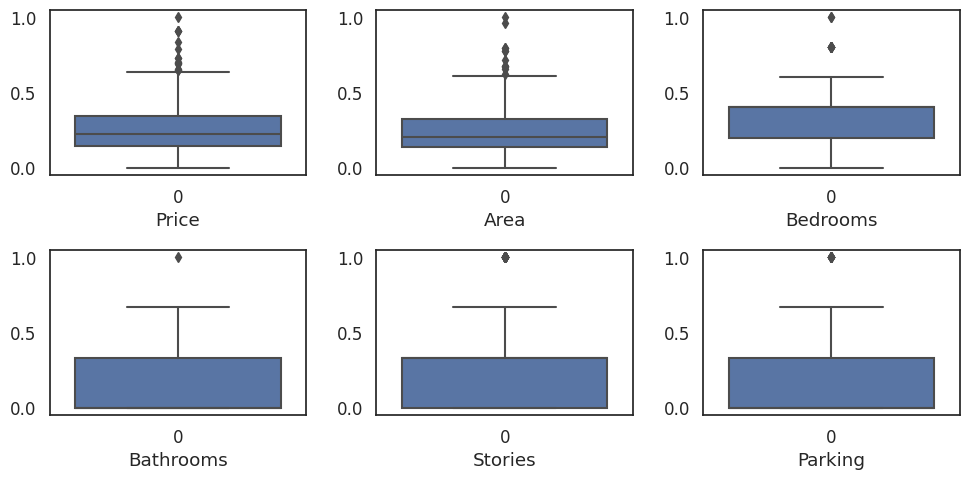

In [ ]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(data['price'],ax = axs[0,0])
plt1.set(xlabel="Price")
plt2 = sns.boxplot(data['area'], ax = axs[0,1])
plt2.set(xlabel="Area")
plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2])
plt3.set(xlabel="Bedrooms")
plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
plt1.set(xlabel="Bathrooms")
plt2 = sns.boxplot(data['stories'], ax = axs[1,1])
plt2.set(xlabel="Stories")
plt3 = sns.boxplot(data['parking'], ax = axs[1,2])
plt3.set(xlabel="Parking")


plt.tight_layout()

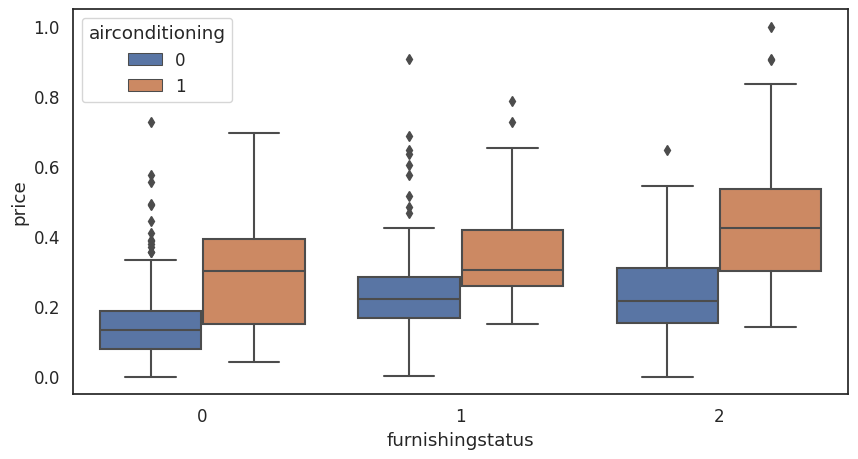

In [ ]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = data)
plt.show()

# 4- Machine Learning Algorithm

> Linear Regression

In [ ]:
#Selecting features and target variable
x = data.drop('price',axis='columns')
y = data['price']

In [ ]:
#Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#Building Linear Regression Model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Model Evaluation
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.013281243729270758
R-squared: 0.6494754192267789


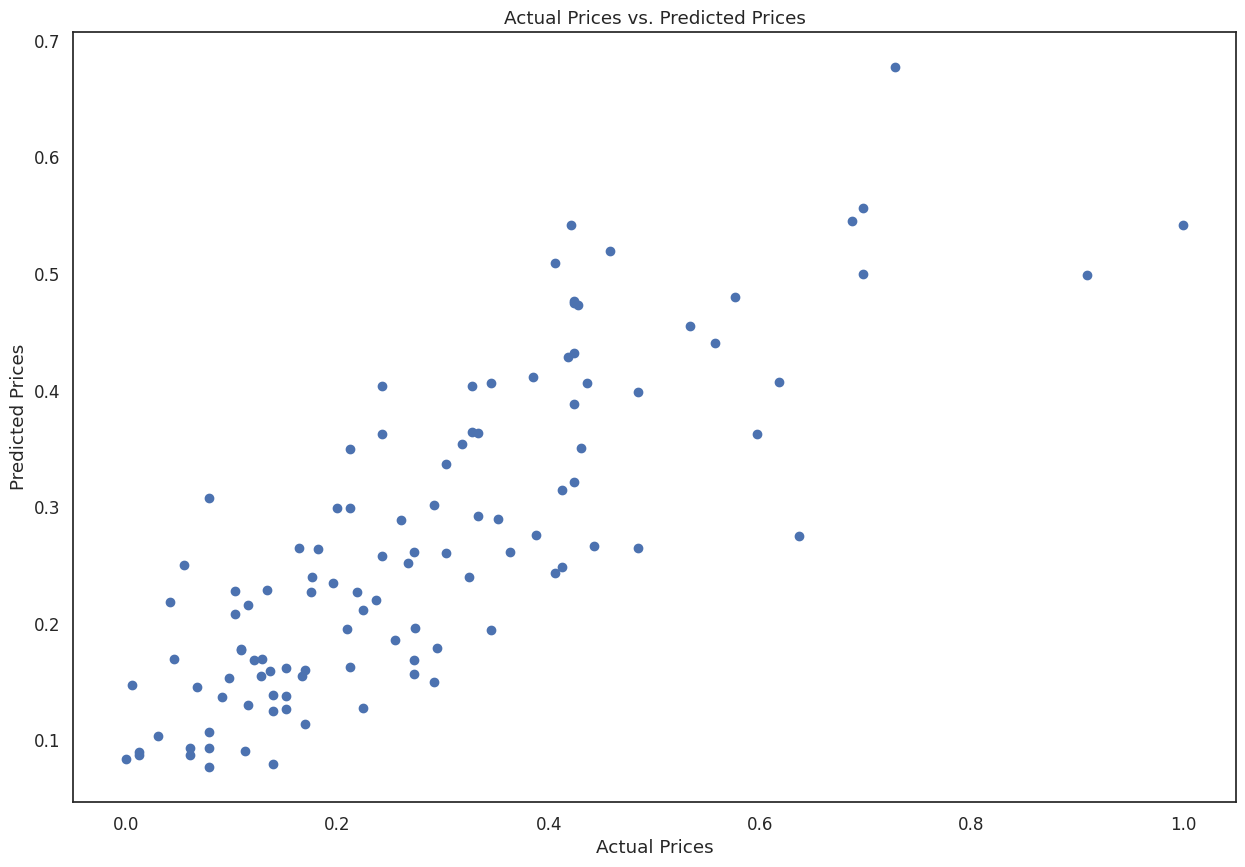

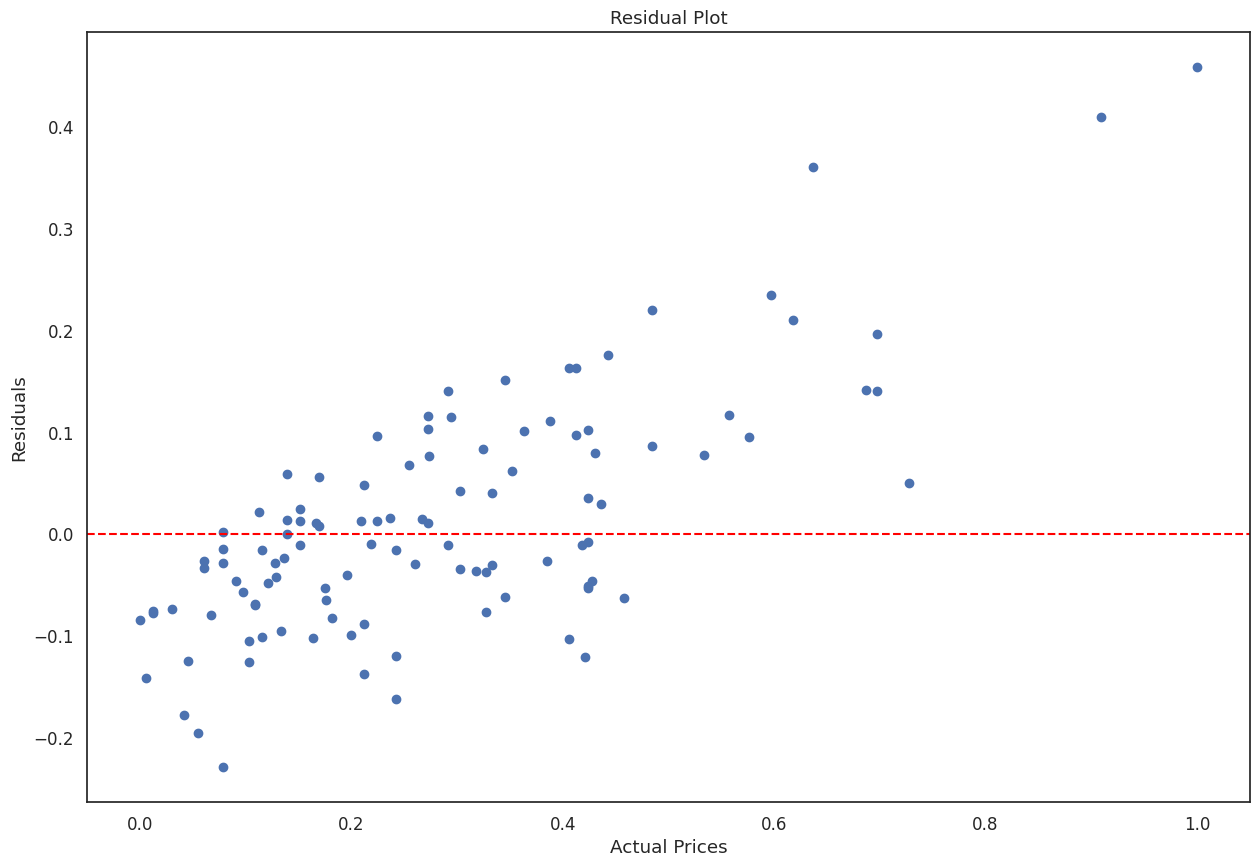

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#Predictions and Visualization
plt.figure(figsize=(15, 10))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

#Create a residual plot to check the model performance
plt.figure(figsize=(15, 10))
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

#Create a simple
new_data = [[2500, 3, 2, 1, 2, 1, 0, 0, 1, 1, 0, 0]]
predicted_price = model.predict(new_data)

In [ ]:
print("Predicted Price:", predicted_price[0])

Predicted Price: 743.7664098502249
